conveyor_size = 1536x2048, phone_size = 1280x720


### Labelling data

Need Square 224x224 image for best accuracy

Cut unnecessary part of the longer side => both size are equal => resize to 224x224 (ImageNet size, used to pretrain Resnet in torchvision)

In [3]:
import cv2
frame_origin = cv2.imread(r'.\processed_data\conveyor_frames\frame_503.jpg')

In [16]:
frame_origin.shape

(1536, 2048, 3)

In [17]:
padding = int((frame_origin.shape[1]-frame_origin.shape[0])/2)

In [26]:
frame_cut_to_square = frame_origin[:, padding+120: padding + frame_origin.shape[0] + 120, :] 
# Camera bị lệch, chỉnh lại với tham số =120 để lấy đúng chính giữa băng chuyền

In [27]:
frame_cut_to_square.shape

(1536, 1536, 3)

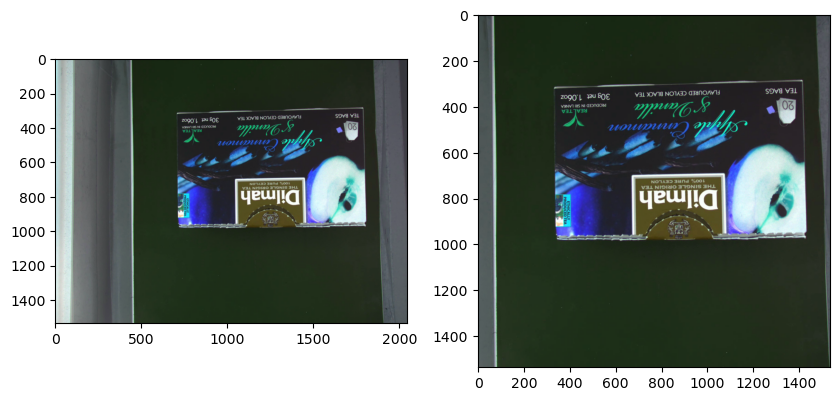

In [28]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(frame_origin)
plt.subplot(1, 2, 2)
plt.imshow(frame_cut_to_square)

Text(0.5, 1.0, 'AREA')

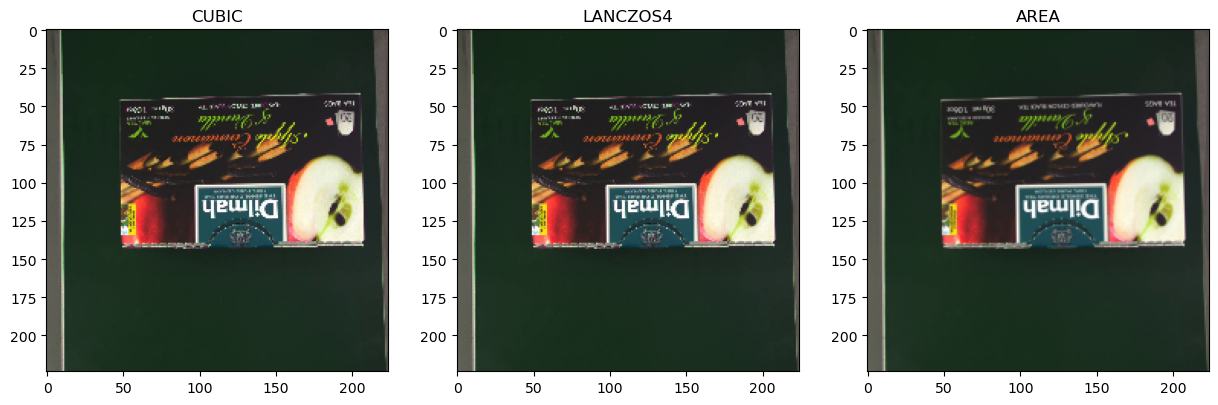

In [37]:
frame_cut_and_resizeCUBIC = cv2.resize(frame_cut_to_square, (224, 224), interpolation=cv2.INTER_CUBIC)
frame_cut_and_resizeLANCZOS4 = cv2.resize(frame_cut_to_square, (224, 224), interpolation=cv2.INTER_LANCZOS4)
frame_cut_and_resizeArea = cv2.resize(frame_cut_to_square, (224, 224), interpolation=cv2.INTER_AREA)
frame_final_CUBIC = cv2.cvtColor(frame_cut_and_resizeCUBIC, cv2.COLOR_BGR2RGB)
frame_final_LANCZOS4 = cv2.cvtColor(frame_cut_and_resizeLANCZOS4, cv2.COLOR_BGR2RGB)
frame_final_Area = cv2.cvtColor(frame_cut_and_resizeArea, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(frame_final_CUBIC)
plt.title('CUBIC')
plt.subplot(1, 3, 2)
plt.imshow(frame_final_LANCZOS4)
plt.title('LANCZOS4')
plt.subplot(1, 3, 3)
plt.imshow(frame_final_Area)
plt.title('AREA')

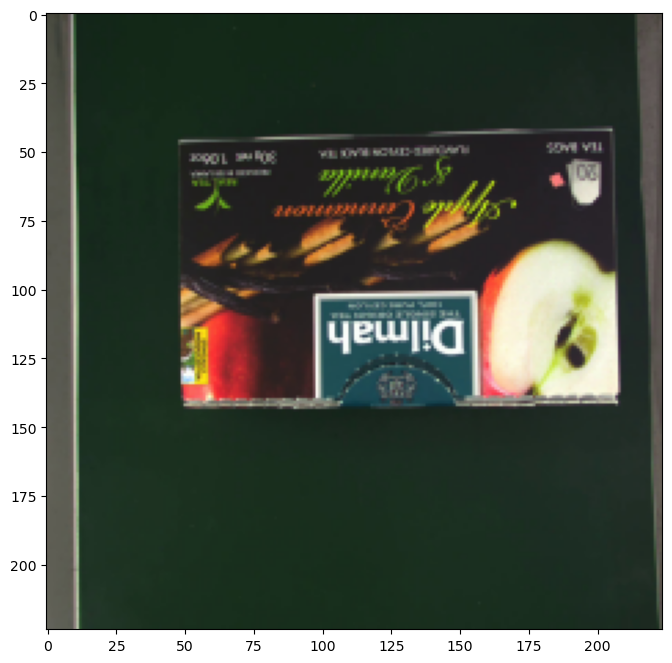

In [41]:
plt.figure(figsize=(8, 8))
plt.imshow(frame_final_Area)

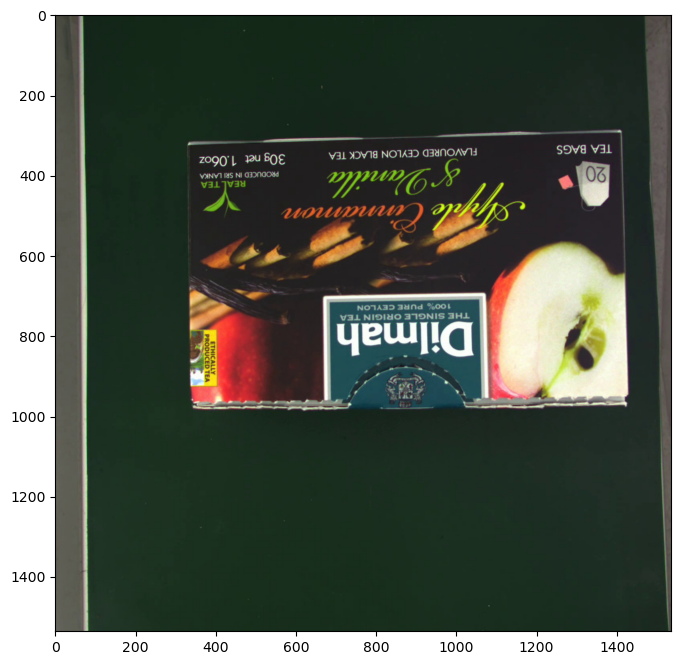

In [42]:
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(frame_cut_to_square, cv2.COLOR_BGR2RGB))

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Users\Admin\Documents\[ARS_SP1]14_Mini_Project_1\via_export_csv.csv')

In [2]:
data.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,frame_0.jpg,110394,"{""ObjectBackground"":""background""}",0,0,{},{}
1,frame_1.jpg,140985,{},0,0,{},{}
2,frame_2.jpg,169622,{},0,0,{},{}
3,frame_3.jpg,178348,{},0,0,{},{}
4,frame_4.jpg,183352,{},0,0,{},{}


In [5]:
sample = data.iloc[130]
sample

filename                                                       frame_130.jpg
file_size                                                             286142
file_attributes                                {"ObjectBackground":"object"}
region_count                                                               1
region_id                                                                  0
region_shape_attributes    {"name":"rect","x":878,"y":953,"width":699,"he...
region_attributes                                          {"type":"dilmah"}
Name: 130, dtype: object

In [6]:
sample['region_shape_attributes']

'{"name":"rect","x":878,"y":953,"width":699,"height":583}'

In [1]:
def crop_and_resize(frame):
    padding = int((frame.shape[1]-frame.shape[0])/2)
    frame_cut_to_square = frame[:, padding+120: padding + frame.shape[0] + 120, :]
    frame_cut_and_resize = cv2.resize(frame_cut_to_square, (224, 224), interpolation=cv2.INTER_CUBIC)
    frame_final = cv2.cvtColor(frame_cut_and_resize, cv2.COLOR_BGR2RGB)
    return frame_final

In [2]:
def crop_only(frame):
    padding = int((frame.shape[1]-frame.shape[0])/2)
    frame_cut_to_square = frame[:, padding+120: padding + frame.shape[0] + 120, :]
    frame_final = cv2.cvtColor(frame_cut_to_square, cv2.COLOR_BGR2RGB)
    return frame_final

In [3]:
import cv2
import os
import glob

conveyor_frames_path = r'.\frames_origin_size\conveyor_frames'
output_path = r'.\frames_224\conveyor_frames'

conveyor_images = glob.glob(os.path.join(conveyor_frames_path, '*.jpg'))
len(conveyor_images)


25448

In [ ]:
for i in range(len(conveyor_images)):
    frame_origin = cv2.imread(os.path.join(conveyor_frames_path, conveyor_images[i]))
    frame_final = crop_and_resize(frame_origin)
    cv2.imwrite(os.path.join(output_path, conveyor_images[i]), cv2.cvtColor(frame_final, cv2.COLOR_RGB2BGR))

In [8]:
# fix some missing frames around frame_9000 to frame 10000
import cv2
import os
import glob

conveyor_frames_path = r'.\frames_origin_size\conveyor_frames'
output_path = r'.\frames_224\conveyor_frames'

missing_frames = [os.path.join(conveyor_frames_path, frame) for frame in conveyor_images if '88' in frame.split('_')[1]]

for i in range(len(missing_frames)):
    frame_origin = cv2.imread(missing_frames[i])
    frame_final = crop_and_resize(frame_origin)
    cv2.imwrite(os.path.join(output_path, os.path.basename(missing_frames[i])), cv2.cvtColor(frame_final, cv2.COLOR_RGB2BGR))

In [7]:
missing_frames

['.\\frames_origin_size\\conveyor_frames\\frame_9.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_90.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_900.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9000.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9001.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9002.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9003.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9004.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9005.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9006.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9007.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9008.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9009.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_901.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9010.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9011.jpg',
 '.\\frames_origin_size\\conveyor_frames\\frame_9012.jpg',
 '.\

In [1]:
def crop_and_resize_phone(frame):
    padding = int((frame.shape[0]-frame.shape[1])/2)
    frame_cut_to_square = frame[padding : frame.shape[0] - 120, :, :]
    frame_cut_and_resize = cv2.resize(frame_cut_to_square, (224, 224), interpolation=cv2.INTER_CUBIC)
    frame_final = cv2.cvtColor(frame_cut_and_resize, cv2.COLOR_BGR2RGB)

    return frame_final

In [4]:
test_img = cv2.imread(r'C:\Users\Admin\Documents\[ARS_SP1]14_Mini_Project_1\frames_origin_size\phone_frames\g7\frame_2853.jpg')

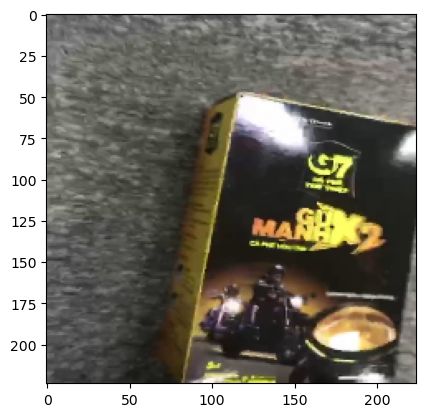

In [5]:
import matplotlib.pyplot as plt
plt.imshow(crop_and_resize_phone(test_img))

In [7]:
import os
folder_path = r'C:\Users\Admin\Documents\[ARS_SP1]14_Mini_Project_1\frames_origin_size\phone_frames'
subfolders = [folder_path + '\\' + folder for folder in os.listdir(folder_path)]
subfolders

['C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\dilmah',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\g7',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\jack-jill',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\karo',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\nestea_atiso',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\nestea_chanh',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\nestea_hoaqua',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\orion',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_origin_size\\phone_frames\\tipo',
 'C:\\Users\\Admin\\Documents\\[ARS_SP1]14_Mini_Project_1\\frames_ori

In [16]:
import os
import glob

# Create subfolders in the output directory
output_base_path = r'C:\Users\Admin\Documents\[ARS_SP1]14_Mini_Project_1\frames_224\phone_frames_labelled'

for subfolder in subfolders:
    subfolder_name = os.path.basename(subfolder)
    output_subfolder_path = os.path.join(output_base_path, subfolder_name)
    os.makedirs(output_subfolder_path, exist_ok=True)

    # Process each image in the current subfolder
    images = [subfolder + '\\' + image for image in os.listdir(subfolder)]
    for image_path in images:
        frame_origin = cv2.imread(image_path)
        frame_final = crop_and_resize_phone(frame_origin)
        output_image_name = os.path.splitext(os.path.basename(image_path))[0] + '_phone.jpg'
        output_image_path = os.path.join(output_subfolder_path, output_image_name)
        cv2.imwrite(output_image_path, cv2.cvtColor(frame_final, cv2.COLOR_RGB2BGR))